In [19]:
%matplotlib inline

import numpy as np
from PIL import Image, ImageDraw, ImageColor
import math
import matplotlib.pyplot as plt
import onnxruntime as rt
import time

# Test Single Image

In [54]:
model_path = "/home/ubuntu/ibrahim/master/training/ssd_mobilenet/final/saved_model/model.onnx"

In [55]:
img = Image.open('/home/ubuntu/ibrahim/master/models/research/object_detection/test_images/img1.jpg')
img_data = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)
img_data = np.expand_dims(img_data.astype(np.uint8), axis=0)

In [56]:
sess = rt.InferenceSession(model_path)

In [57]:
input_name = sess.get_inputs()[0].name
outputs = ["num_detections", "detection_boxes", "detection_scores", "detection_classes"]

In [58]:
start_time = time.time()
result = sess.run(outputs, {"input_tensor": img_data})
print("FPS: ", 1.0 / (time.time() - start_time)) 
num_detections, detection_boxes, detection_scores, detection_classes = result

FPS:  20.86583454801431


In [49]:
num_detections, boxes, scores, classes = result[0][0], result[1][0], result[2][0], result[3][0]

In [53]:
classes

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 4., 4.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 3., 3., 2., 1., 3., 3., 1., 1., 3.,
       1., 3., 1., 2., 1., 1., 1., 1., 1., 1., 4., 1., 1., 2., 4., 1., 1.,
       1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 3., 3.],
      dtype=float32)

In [59]:
coco_classes = {
    1: 'car',
    2: 'van',
    3: 'bus',
    4: 'others',
}

def draw_detection(draw, d, c):
    """Draw box and label for 1 detection."""
    width, height = draw.im.size
    top = d[0] * height
    left = d[1] * width
    bottom = d[2] * height
    right = d[3] * width
    top = max(0, np.floor(top + 0.5).astype('int32'))
    left = max(0, np.floor(left + 0.5).astype('int32'))
    bottom = min(height, np.floor(bottom + 0.5).astype('int32'))
    right = min(width, np.floor(right + 0.5).astype('int32'))
    label = coco_classes[c]
    label_size = draw.textsize(label)
    if top - label_size[1] >= 0:
        text_origin = tuple(np.array([left, top - label_size[1]]))
    else:
        text_origin = tuple(np.array([left, top + 1]))
    color = ImageColor.getrgb("red")
    thickness = 0
    draw.rectangle([left + thickness, top + thickness, right - thickness, bottom - thickness], outline=color)
    draw.text(text_origin, label, fill=color)

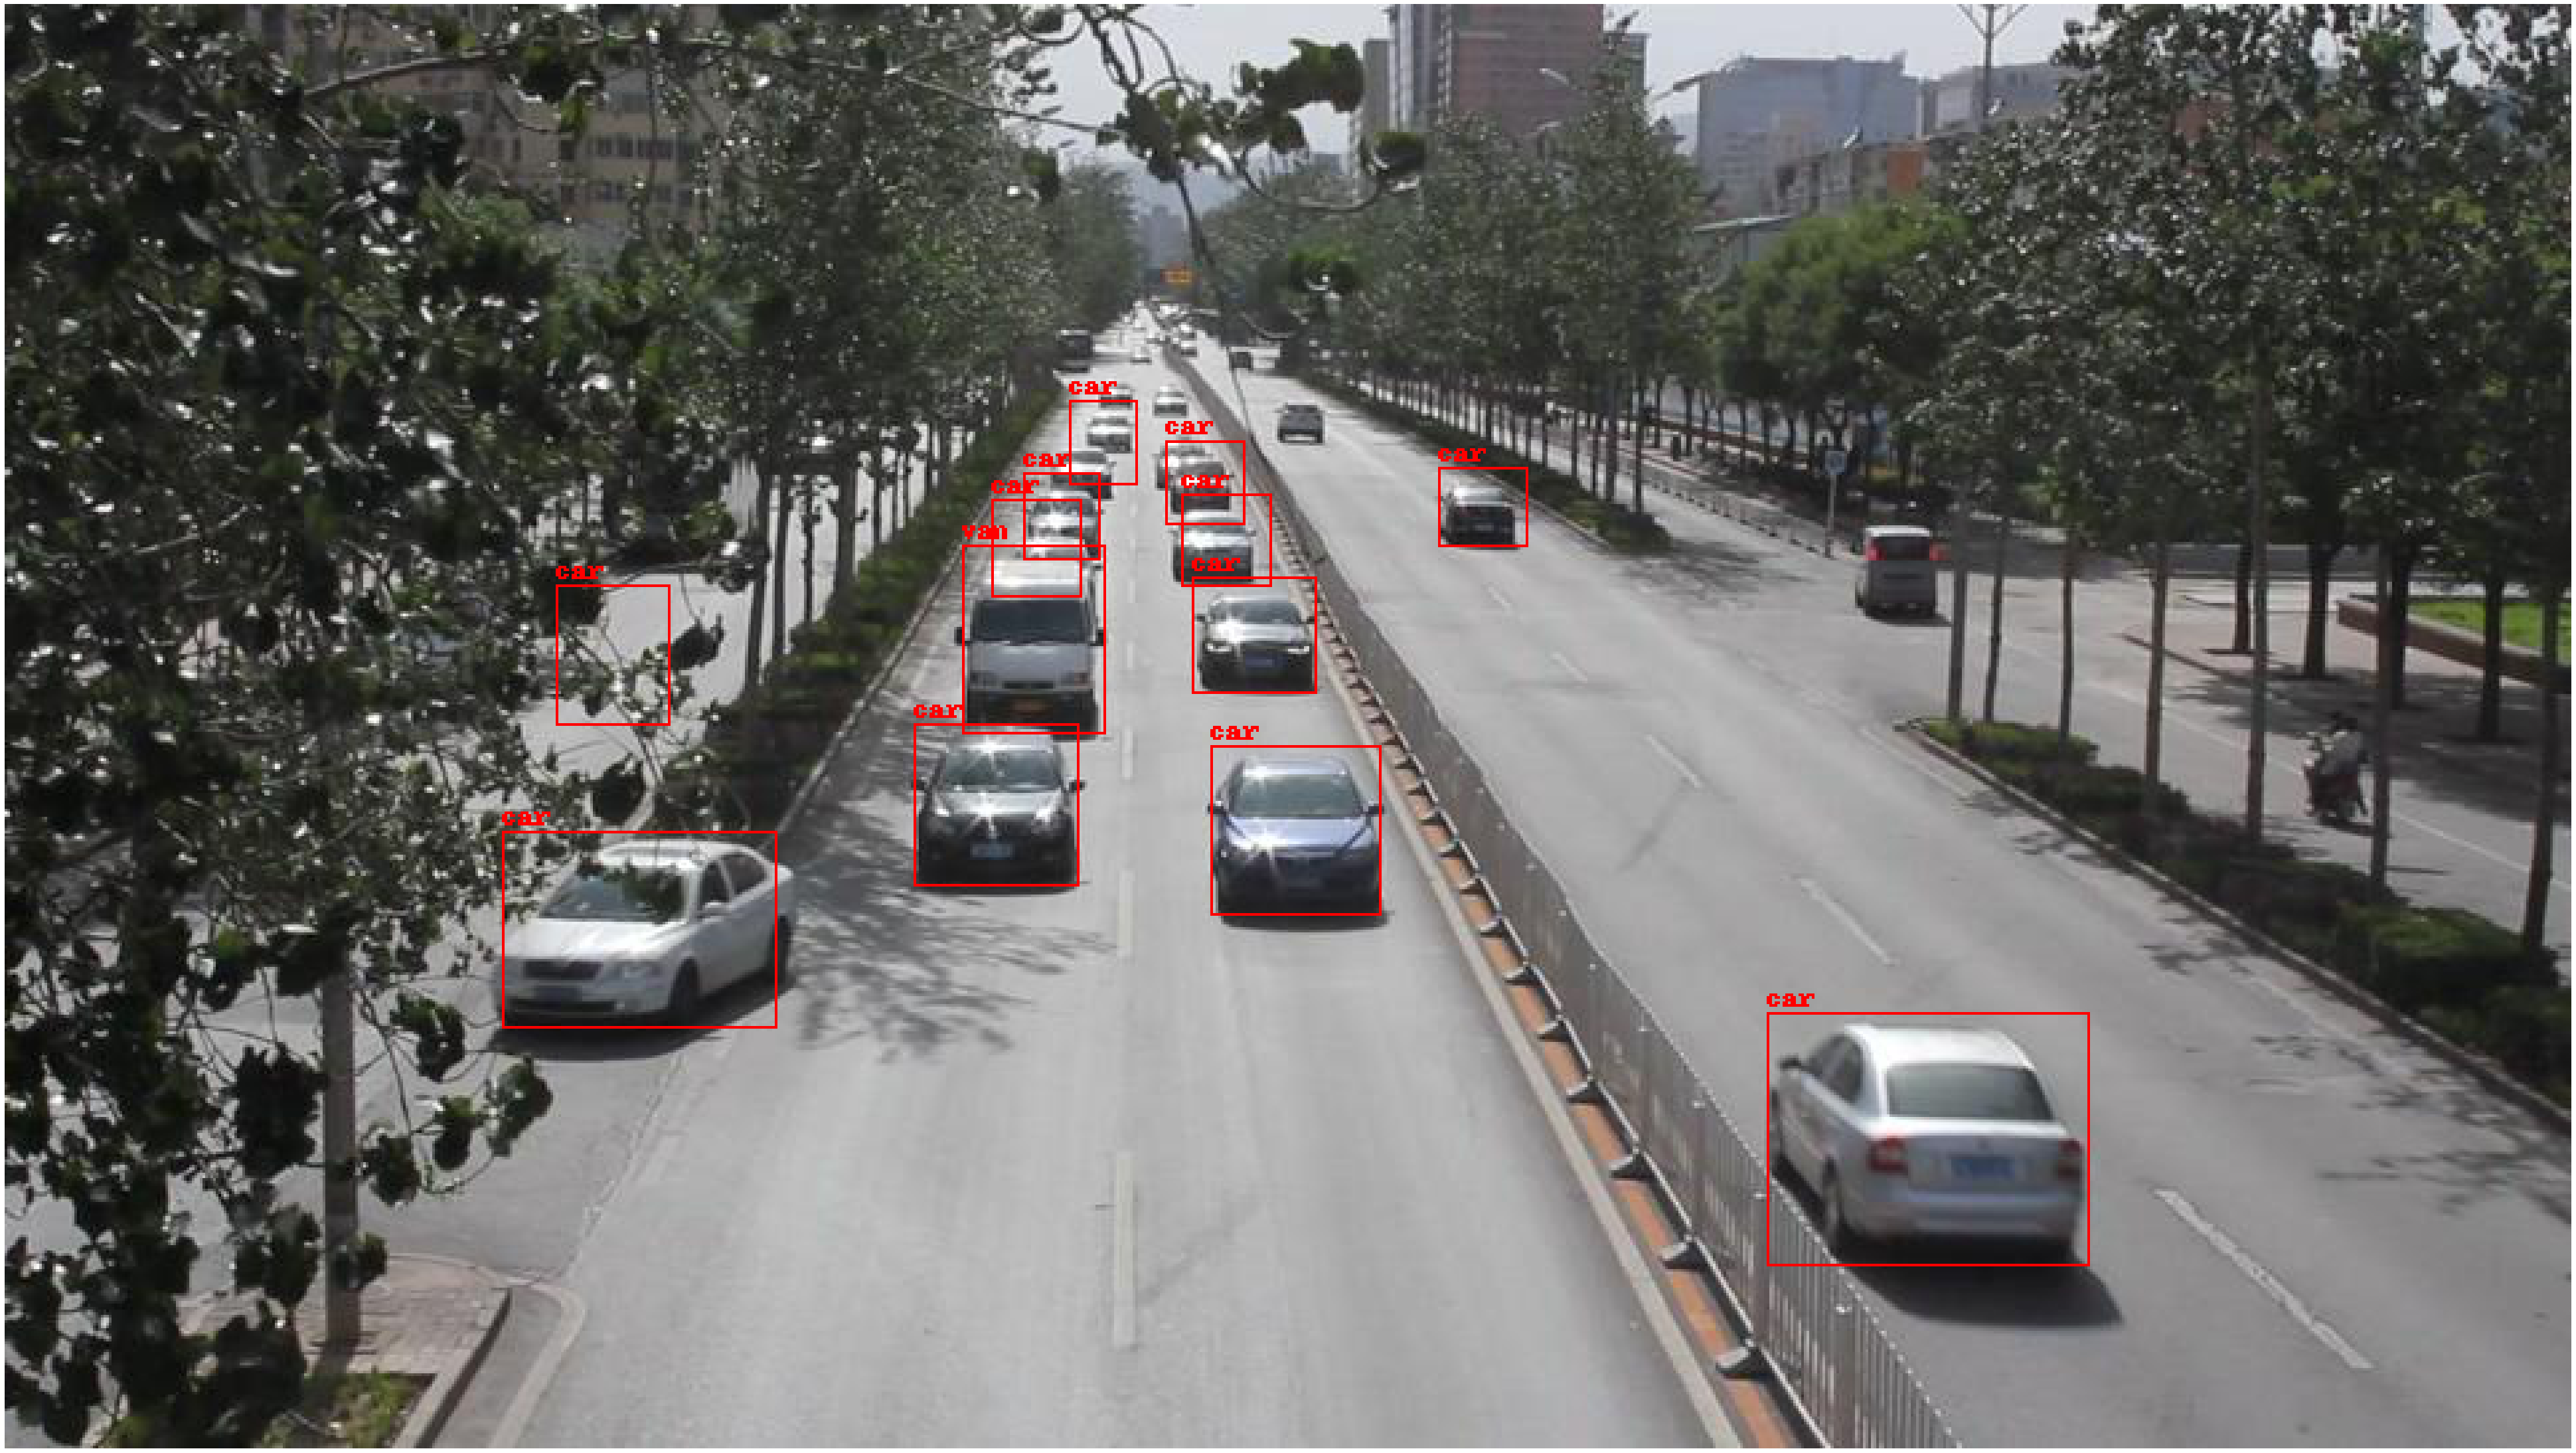

In [60]:
batch_size = num_detections.shape[0]
draw = ImageDraw.Draw(img)
for batch in range(0, batch_size):
    for detection in range(0, int(num_detections[batch])):
        if detection_scores[batch][detection]>0.5:
            c = detection_classes[batch][detection]
            d = detection_boxes[batch][detection]
            draw_detection(draw, d, c)

plt.figure(figsize=(80, 40))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
img.save("geeks.jpg")

In [62]:
DETRAC_TEST = '/home/ubuntu/ibrahim/master/datasets/Insight-MVT_Annotation_Test'
import os
sorted(os.listdir(DETRAC_TEST))

['MVI_39031',
 'MVI_39051',
 'MVI_39211',
 'MVI_39271',
 'MVI_39311',
 'MVI_39361',
 'MVI_39371',
 'MVI_39401',
 'MVI_39501',
 'MVI_39511',
 'MVI_40701',
 'MVI_40711',
 'MVI_40712',
 'MVI_40714',
 'MVI_40742',
 'MVI_40743',
 'MVI_40761',
 'MVI_40762',
 'MVI_40763',
 'MVI_40771',
 'MVI_40772',
 'MVI_40773',
 'MVI_40774',
 'MVI_40775',
 'MVI_40792',
 'MVI_40793',
 'MVI_40851',
 'MVI_40852',
 'MVI_40853',
 'MVI_40854',
 'MVI_40855',
 'MVI_40863',
 'MVI_40864',
 'MVI_40891',
 'MVI_40892',
 'MVI_40901',
 'MVI_40902',
 'MVI_40903',
 'MVI_40904',
 'MVI_40905']